# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from matplotlib.colors import LinearSegmentedColormap

In [3]:
df1 = pd.read_csv('E:/Datasets/v1_Latest_Data_Science_Salaries.csv')
df2 = pd.read_csv('E:/Datasets/v2_Latest_Data_Science_Salaries.csv')
df3 = pd.read_csv('E:/Datasets/v3_Latest_Data_Science_Salaries.csv')
df4 = pd.read_csv('E:/Datasets/v4_Latest_Data_Science_Salaries.csv')
df5 = pd.read_csv('E:/Datasets/v5_Latest_Data_Science_Salaries.csv')
df6 = pd.read_csv('E:/Datasets/v6_Latest_Data_Science_Salaries.csv')

In [5]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)
print(df6.columns)

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary

### All the 6 files contains the same columns names and same number of columns. Lets merge them into one

In [7]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df = pd.concat([df, df3], axis=0, ignore_index=True)
df = pd.concat([df, df4], axis=0, ignore_index=True)
df = pd.concat([df, df5], axis=0, ignore_index=True)
df = pd.concat([df, df6], axis=0, ignore_index=True)

In [23]:
df.describe

<bound method NDFrame.describe of                       Job Title Employment Type Experience Level  \
0                 Data Engineer       Full-Time           Senior   
1                 Data Engineer       Full-Time           Senior   
2                 Data Engineer       Full-Time           Senior   
3                 Data Engineer       Full-Time           Senior   
4                Data Scientist       Full-Time           Senior   
...                         ...             ...              ...   
22927            Data Scientist       Full-Time           Senior   
22928  Principal Data Scientist       Full-Time              Mid   
22929            Data Scientist       Full-Time            Entry   
22930     Business Data Analyst        Contract            Entry   
22931      Data Science Manager       Full-Time           Senior   

      Expertise Level   Salary       Salary Currency Company Location  \
0              Expert   210000  United States Dollar    United States   
1  

In [148]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

### No null values in the dataframe

### Cleaning the string variables by removing the white spaces.

In [9]:
df['Job Title'] = df['Job Title'].str.strip()
df['Employment Type'] = df['Employment Type'].str.strip()
df['Experience Level'] = df['Experience Level'].str.strip()
df['Expertise Level'] = df['Expertise Level'].str.strip()
df['Company Location'] = df['Company Location'].str.strip()
df['Company Size'] = df['Company Size'].str.strip()

In [152]:
df['Job Title'].unique()

array(['Data Engineer', 'Data Scientist', 'Analytics Engineer',
       'Business Intelligence Developer', 'Machine Learning Engineer',
       'Data Analyst', 'Decision Scientist',
       'Machine Learning Software Engineer', 'BI Developer',
       'Machine Learning Scientist', 'BI Analyst', 'Data Manager',
       'Business Intelligence Engineer', 'ML Engineer',
       'Data Science Manager', 'AI Programmer', 'Applied Scientist',
       'Data Analytics Manager', 'Research Engineer',
       'Research Scientist', 'Data Lead', 'Data Strategist',
       'Data Quality Analyst', 'Data Architect', 'AI Architect',
       'Computer Vision Engineer', 'Business Intelligence Analyst',
       'Principal Data Scientist', 'Staff Machine Learning Engineer',
       'Staff Data Scientist', 'Consultant Data Engineer',
       'Machine Learning Specialist', 'Head of Data',
       'Data Quality Engineer', 'Research Analyst',
       'Principal Machine Learning Engineer', 'Deep Learning Engineer',
       'Data

In [154]:
df.shape

(22932, 11)

### Let's remove the rows with duplicate values

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(4981, 11)

- Most of them were duplicate rows and were dropped
- This data is sufficiet for our data analysis

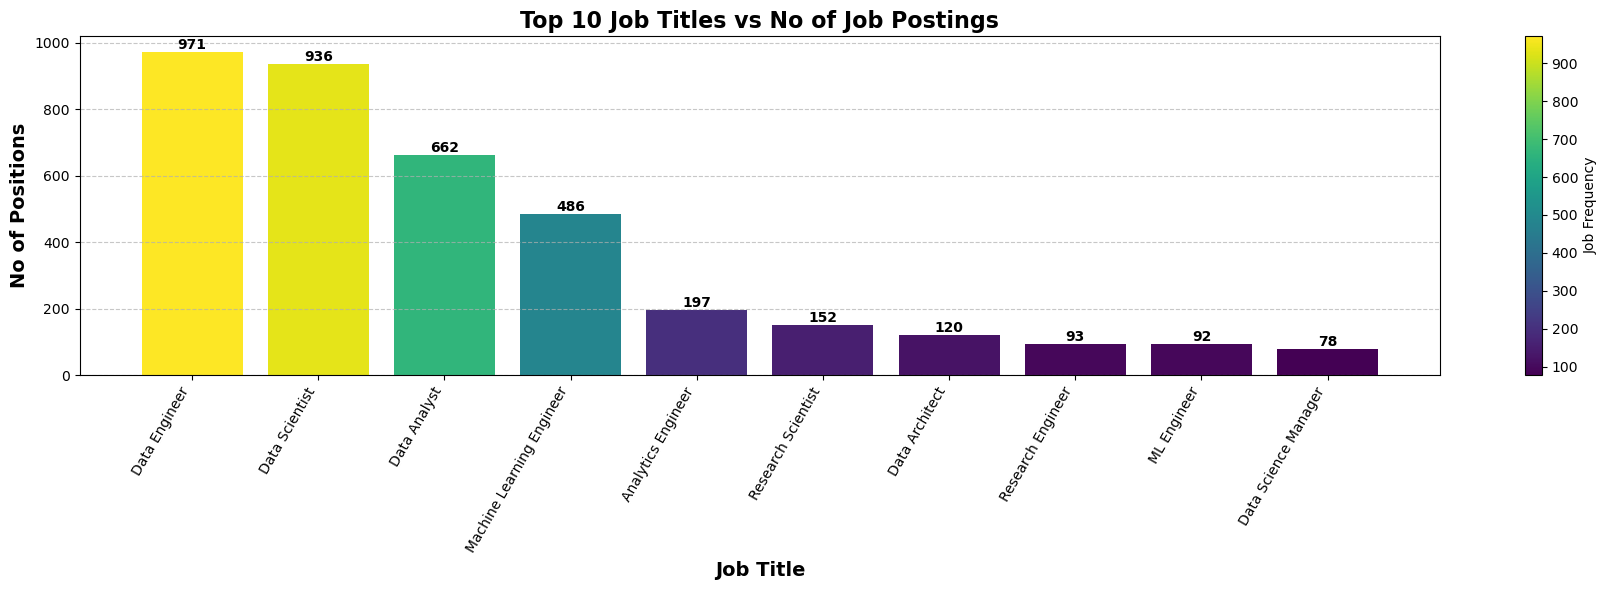

In [13]:
# Count job titles and get top 20
job_title_count = df['Job Title'].value_counts().head(10)


colormap = plt.cm.viridis
normalize = plt.Normalize(min(job_title_count), max(job_title_count))


fig, ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(job_title_count.index, job_title_count, color=colormap(normalize(job_title_count)))

# Add labels and title
plt.xlabel('Job Title', fontsize=14, fontweight='bold')
plt.ylabel('No of Positions', fontsize=14, fontweight='bold')
plt.title('Top 10 Job Titles vs No of Job Postings', fontsize=16, fontweight='bold')

# Annotate the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}',
             ha='center', va='bottom', weight='bold', size=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha='right')

# Grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Display a color bar to explain the color gradient
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Job Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()


In [15]:
df.to_excel('E:/Datasets/Data_Salaries.xlsx', index=False)

#### Creating df_top_10 to contain data for the top 10 roles based on the total number of records in the dataset. The top 10 roles are identified by the highest count of occurrences in the file

In [160]:
df_top_10 = pd.DataFrame()
for idx in job_title_count.index:
    df_top_10 = pd.concat([df_top_10, df[df['Job Title'] == idx]], ignore_index=True)

df_top_10

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3782,Data Science Manager,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Large,2023
3783,Data Science Manager,Full-Time,Senior,Expert,204000,United States Dollar,United States,204000,United States,Medium,2023
3784,Data Science Manager,Full-Time,Senior,Expert,127500,United States Dollar,United States,127500,United States,Medium,2023
3785,Data Science Manager,Full-Time,Senior,Expert,234900,United States Dollar,United States,234900,United States,Medium,2023


## Average Salary vs Job Title

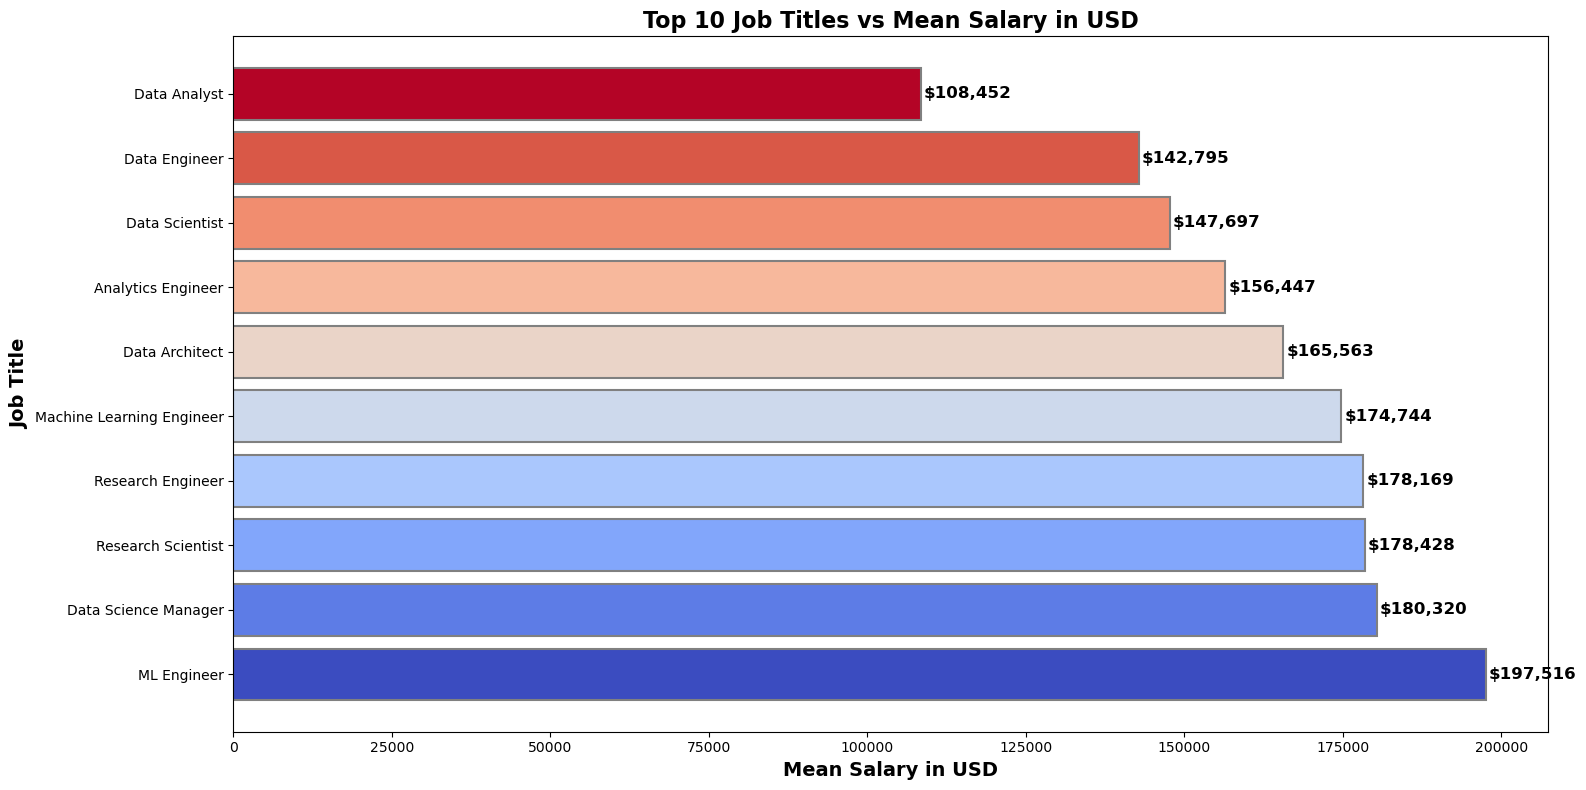

In [162]:
# Calculate average salary for top 10 jobs
df_avg_sal = df_top_10.groupby('Job Title')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

plt.figure(figsize=(16, 8))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(df_avg_sal)))

bars = plt.barh(df_avg_sal['Job Title'], df_avg_sal['Mean_Salary'], color=colors, edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Mean Salary in USD', fontsize=14, fontweight='bold')
plt.ylabel('Job Title', fontsize=14, fontweight='bold')
plt.title('Top 10 Job Titles vs Mean Salary in USD', fontsize=16, fontweight='bold')

# Annotate each bar with the exact salary
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f'${bar.get_width():,.0f}',
             va='center', ha='left', fontsize=12, weight='bold')

# Add a 3D effect by adjusting the bar shadows
for bar in bars:
    bar.set_linewidth(1.5)
    bar.set_edgecolor('gray')

plt.tight_layout()
plt.show()


## Count of Jobs vs Year (for each Job Title)

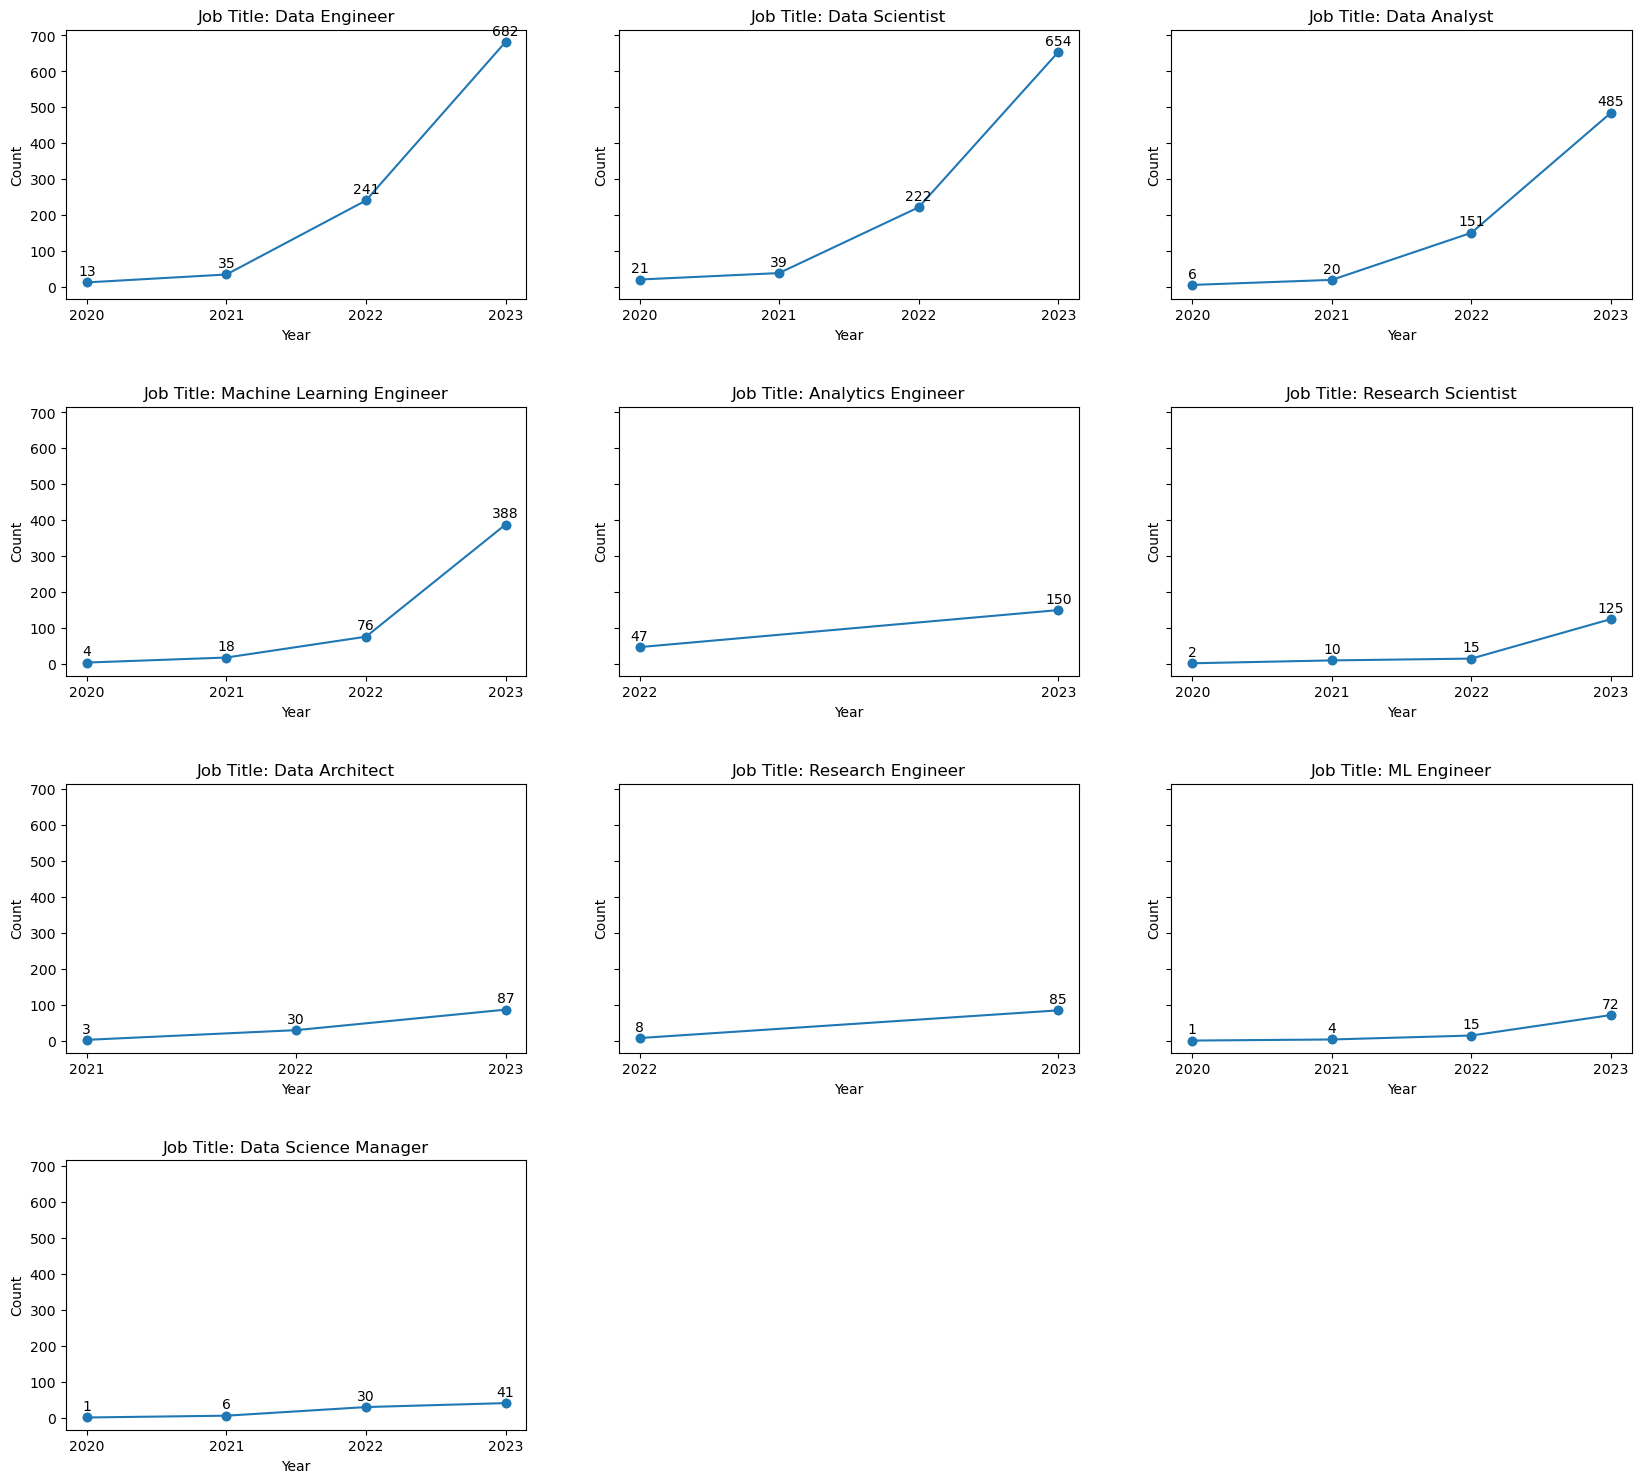

In [164]:
df_new = df_top_10.groupby(['Job Title', 'Year']).size().reset_index(name='Count')

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_new[df_new['Job Title'] == job_title]

    # Plotting data points as well (scatter plot)
    axs[i].scatter(data['Year'], data['Count'], label=job_title, alpha=0.7)

    # Plotting a line connecting the data points
    axs[i].plot(data['Year'], data['Count'], marker='o', linestyle='-')

    # Annotating each data point with the count
    for j, count in enumerate(data['Count']):
        axs[i].annotate(count, xy=(data['Year'].iloc[j], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
     # Set x-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

- In all the case number of jobs have been increased
- Associate level jobs have been drastically increased whereas manager level jobs see only a slight increase

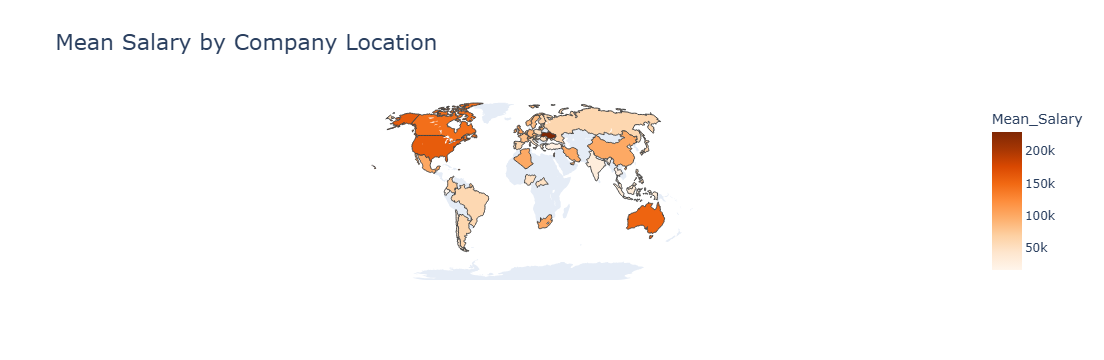

In [166]:
import plotly.express as px

# Group by Company Location and calculate average salary
df_cl_avg_sal = df_top_10.groupby('Company Location')['Salary in USD'].agg(Mean_Salary='mean').reset_index()

# Create a Choropleth map
fig = px.choropleth(
    df_cl_avg_sal,
    locations='Company Location',  # Column with country names
    locationmode='country names',  # Match names of countries
    color='Mean_Salary',           # Data for coloring
    hover_name='Company Location',  # Info shown on hover
    color_continuous_scale=px.colors.sequential.Oranges,  # Color scale
    projection='natural earth',    # Use a natural earth map projection
    title='Mean Salary by Company Location'
)

# Update the layout for better readability
fig.update_layout(
    title_font_size=22,
    geo=dict(
        showframe=False,
        showcoastlines=False
    )
)

# Display the map
fig.show()

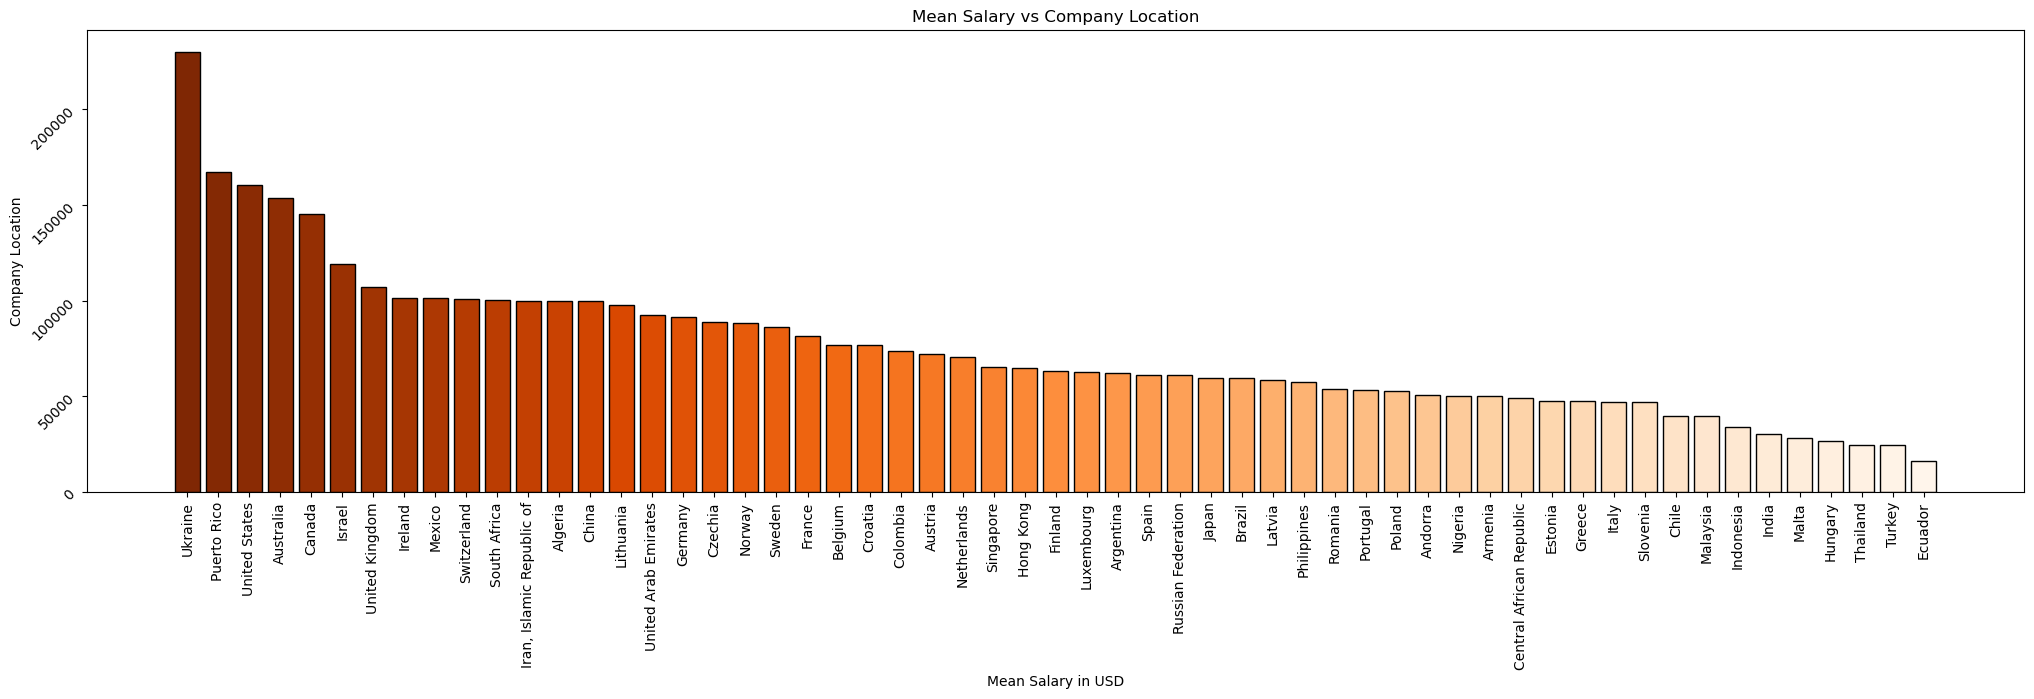

In [172]:
# Create a blue gradient colormap
colors = plt.cm.Oranges_r(np.linspace(0, 1, len(df_cl_avg_sal)))

# Increase figure size
plt.figure(figsize=(25, 6))

# Create a horizontal bar chart
bars = plt.bar(df_cl_avg_sal['Company Location'], df_cl_avg_sal['Mean_Salary'], color=colors, edgecolor='black')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Location')
plt.title('Mean Salary vs Company Location')

# Display the plot
plt.show()

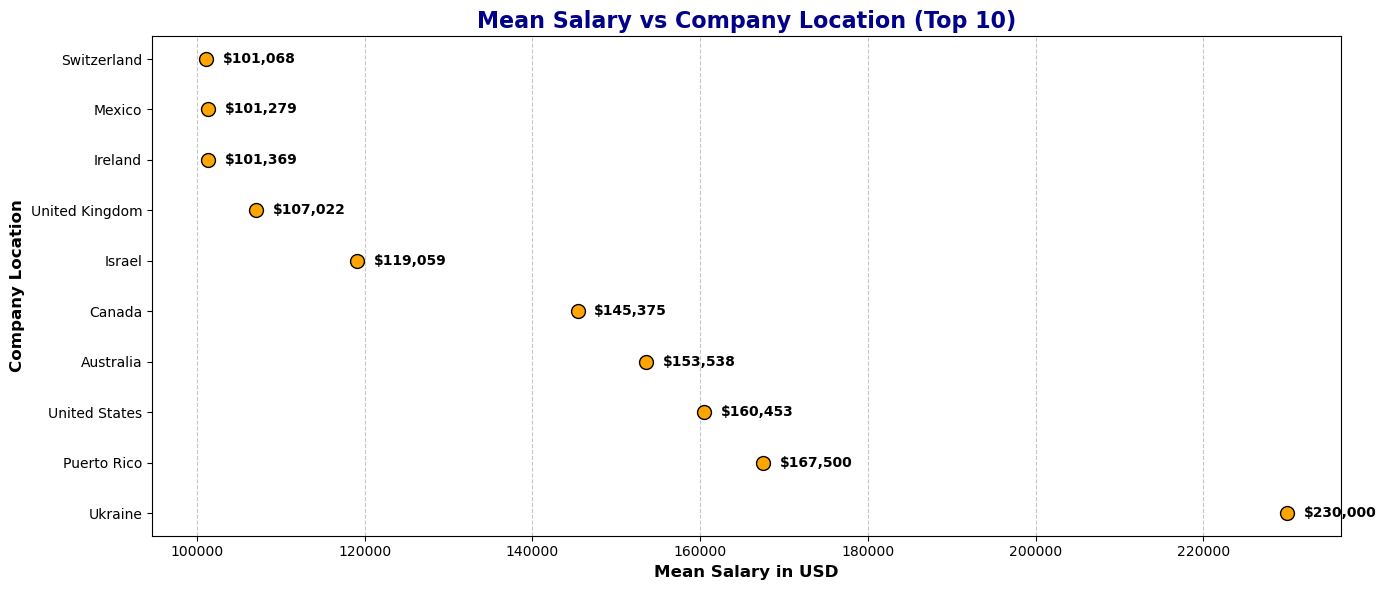

In [174]:
# Ensure df_cl_avg_sal_top10 exists and has valid data
df_cl_avg_sal_top10 = df_cl_avg_sal.head(10)

# Create a gradient colormap
colors = plt.cm.Oranges_r(np.linspace(0, 1, len(df_cl_avg_sal_top10)))

# Increase figure size
plt.figure(figsize=(14, 6))

# Create a horizontal dot plot (scatter plot)
plt.scatter(df_cl_avg_sal_top10['Mean_Salary'], df_cl_avg_sal_top10['Company Location'], color='orange', s=100, edgecolor='black', zorder=3)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding labels and title
plt.xlabel('Mean Salary in USD', fontsize=12, fontweight='bold')
plt.ylabel('Company Location', fontsize=12, fontweight='bold')
plt.title('Mean Salary vs Company Location (Top 10)', fontsize=16, fontweight='bold', color='darkblue')

# Add annotations (mean salary values)
for i in range(len(df_cl_avg_sal_top10)):
    plt.text(df_cl_avg_sal_top10['Mean_Salary'].iloc[i] + 2000, df_cl_avg_sal_top10['Company Location'].iloc[i], 
             f'${df_cl_avg_sal_top10["Mean_Salary"].iloc[i]:,.0f}', 
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

### Create a subset of TOP 10 locations from df_top_10

In [177]:
df_top10 = pd.DataFrame()
for cl in highest_loc:
    df_top10 = pd.concat([df_top10, df_top_10[df_filtered['Company Location'] == cl]], ignore_index=True)
df_top10.head(15)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Scientist,Part-Time,Entry,Junior,100000,United States Dollar,Algeria,100000,Algeria,Medium,2022
1,Data Scientist,Full-Time,Mid,Intermediate,47000,Euro,Andorra,50745,Andorra,Small,2023
2,Data Engineer,Full-Time,Senior,Expert,72000,United States Dollar,Argentina,72000,Argentina,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,48000,United States Dollar,Argentina,48000,Argentina,Medium,2023
4,Data Engineer,Full-Time,Senior,Expert,80000,United States Dollar,Argentina,80000,Argentina,Medium,2023
5,Data Engineer,Full-Time,Senior,Expert,60000,United States Dollar,Argentina,60000,Argentina,Medium,2023
6,Data Analyst,Full-Time,Entry,Junior,50000,United States Dollar,Argentina,50000,Argentina,Large,2022
7,Machine Learning Engineer,Full-Time,Mid,Intermediate,50000,United States Dollar,Armenia,50000,Armenia,Small,2023
8,Data Engineer,Full-Time,Mid,Intermediate,100000,Australian Dollar,Australia,75050,Australia,Large,2021
9,Data Scientist,Full-Time,Mid,Intermediate,120000,Australian Dollar,Australia,83171,Australia,Large,2022


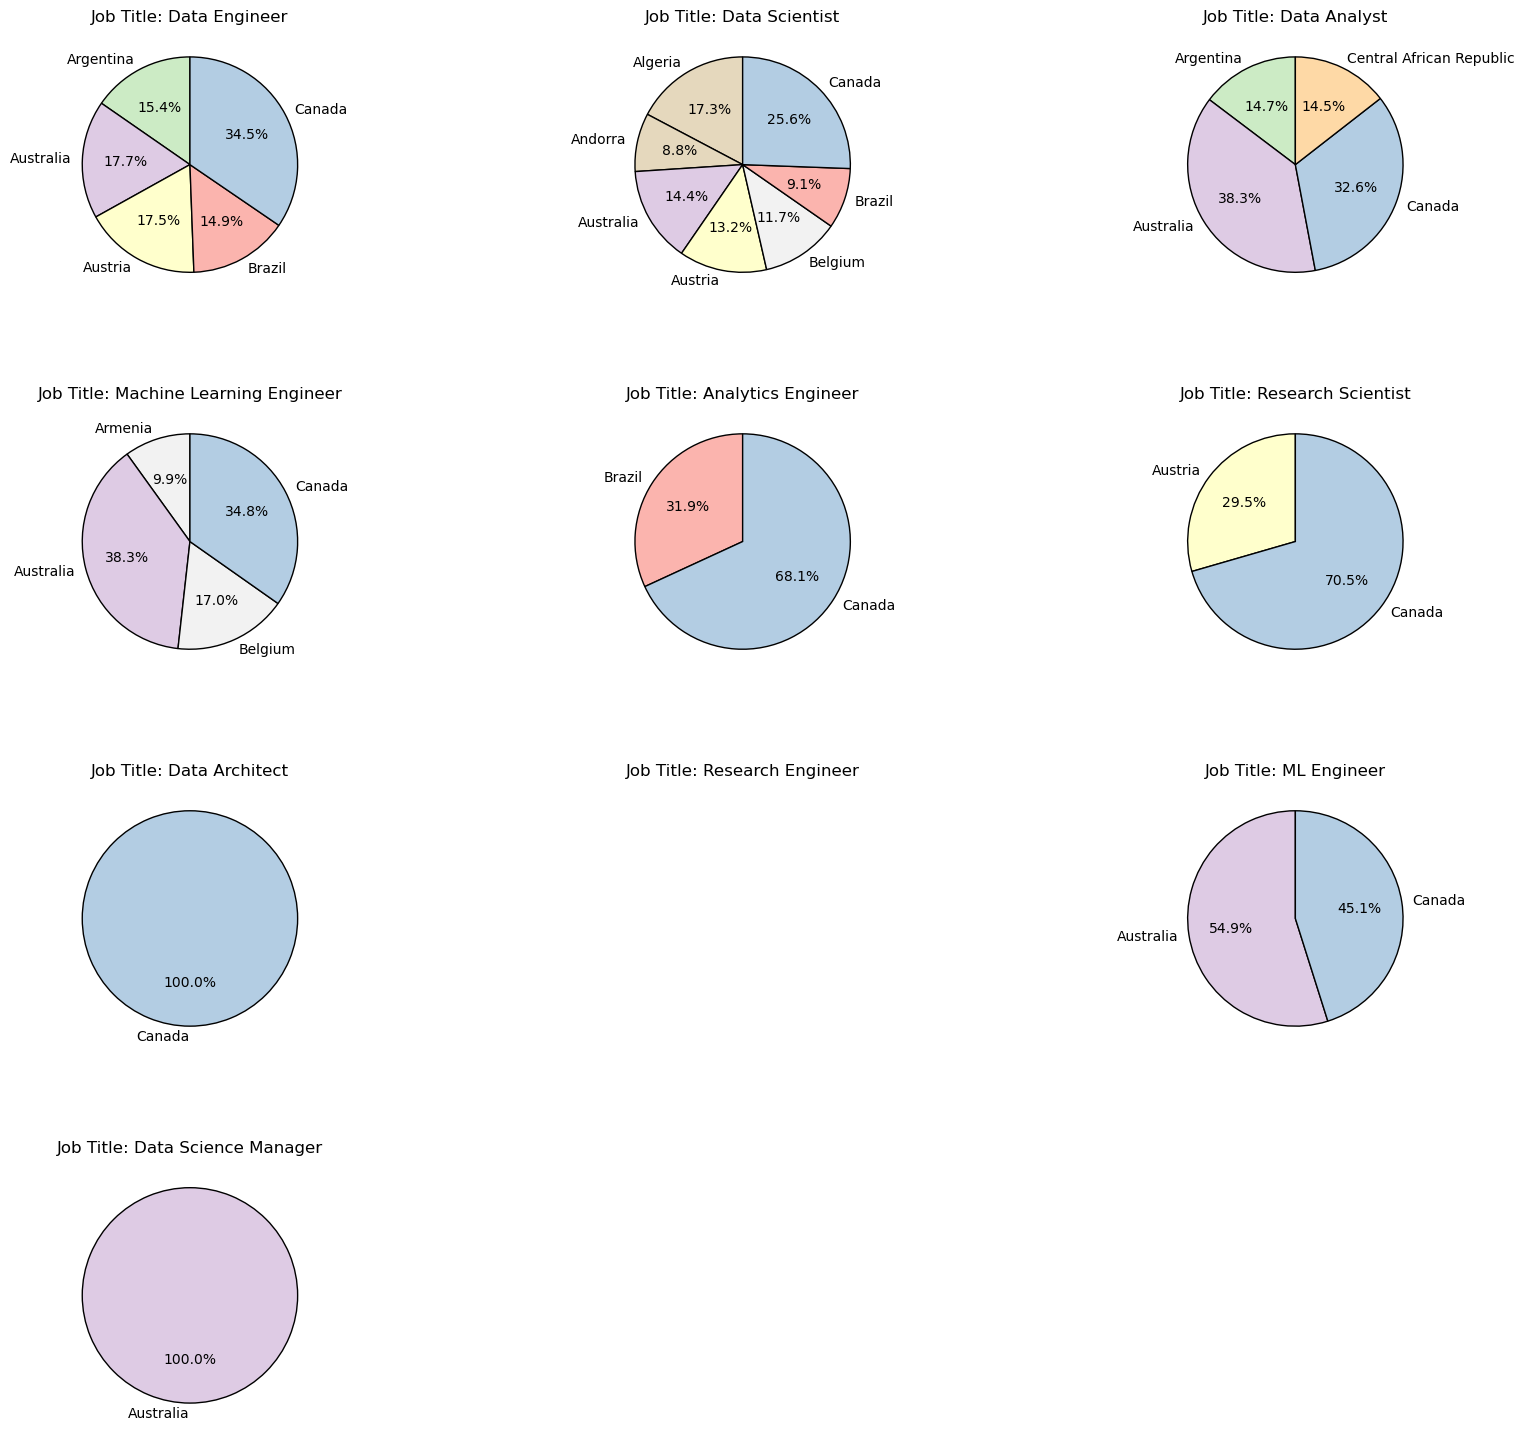

In [184]:
df_top10_grouped = df_top10.groupby(['Job Title', 'Company Location'])['Salary in USD'] \
                         .agg(Mean_Salary='mean').round(2).reset_index() \
                         .sort_values(by=['Job Title', 'Company Location', 'Mean_Salary'],
                                      ascending=[True, True, False])

unique_location = df_top10_grouped['Company Location'].unique()
light_colors = plt.cm.Pastel1(np.linspace(0, 1, len(unique_location)))  
color_mapping_cl_t5 = {location: color for location, color in zip(unique_location, light_colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=False, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_top10_grouped[df_top10_grouped['Job Title'] == job_title]

    # Create a pie chart
    axs[i].pie(data['Mean_Salary'], labels=data['Company Location'], 
               colors=[color_mapping_cl_t5[location] for location in data['Company Location']],
               autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, 
               textprops={'fontsize': 10, 'color': 'black'})  # Black text for labels
    
    # Adding title to each subplot
    axs[i].set_title(f'Job Title: {job_title}', fontsize=12, color='black')  # Black title

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

### Company Size vs Average Salary 

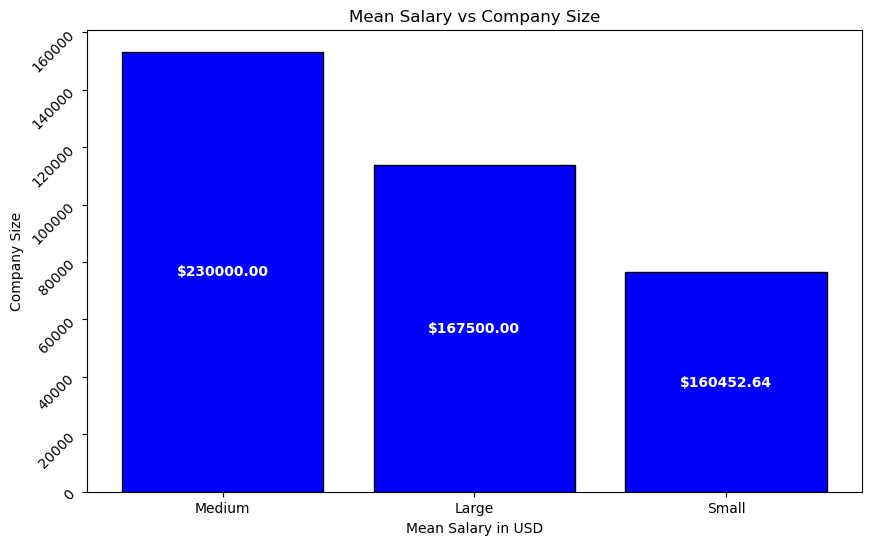

In [188]:
df_cs_avg_sal = df_filtered.groupby('Company Size')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
bars = plt.bar(df_cs_avg_sal['Company Size'], df_cs_avg_sal['Mean_Salary'], color='blue', edgecolor='black')

#Annotate each bar with the mean salary value at the top center
for bar, salary in zip(bars, df_cl_avg_sal['Mean_Salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'${salary:.2f}', ha='center', va='center', fontsize=10, color='white', weight='bold')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
#plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Size')
plt.title('Mean Salary vs Company Size')

# Display the plot
plt.show()

### Average Salary vs Company Size (For Each Job Title)

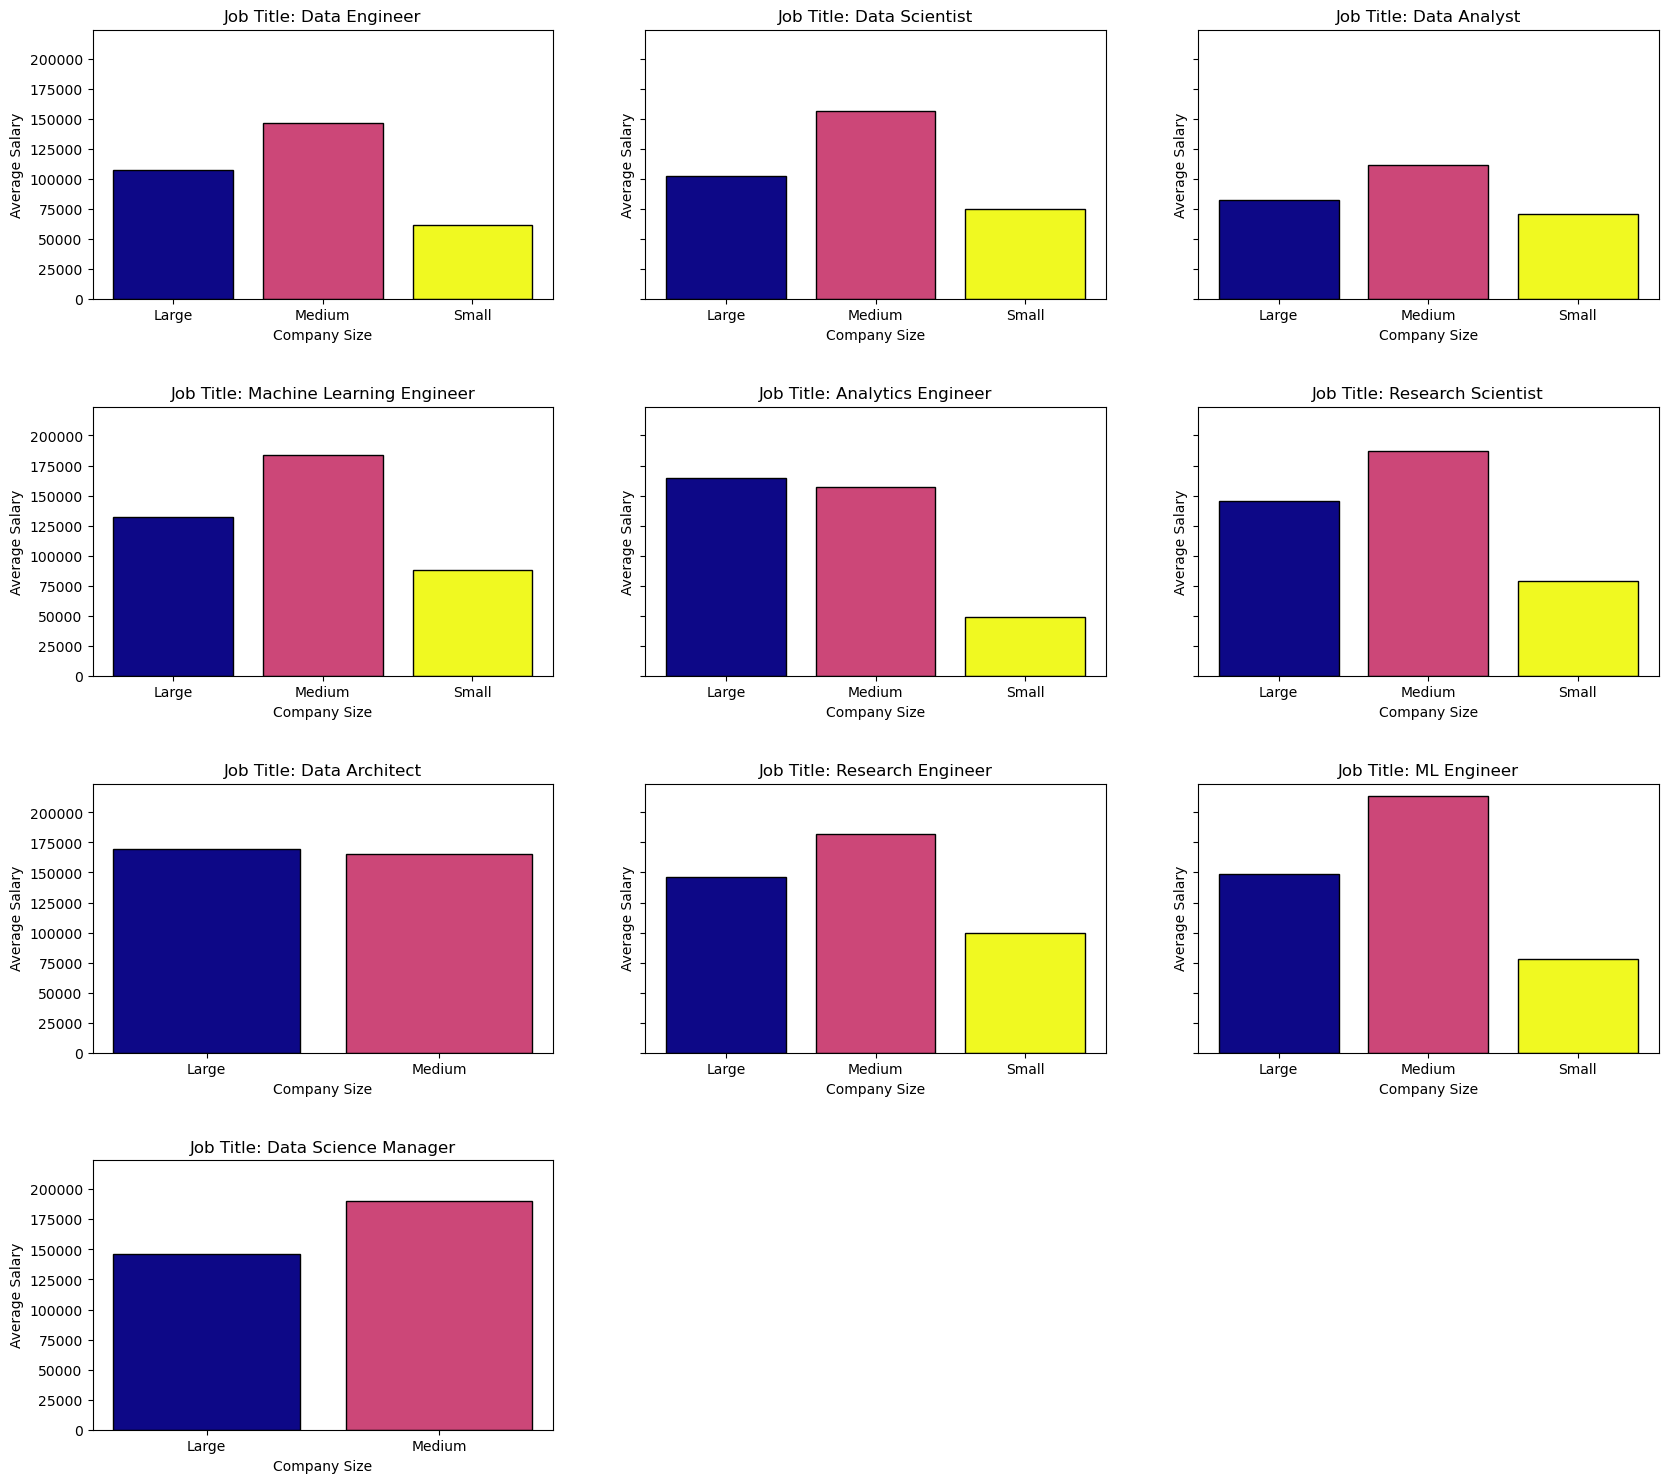

In [190]:
df_cs_avg_sal_jt = df_filtered.groupby(['Job Title', 'Company Size'])['Salary in USD'] \
                              .agg(Mean_Salary='mean') \
                              .round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Company Size', 'Mean_Salary'], ascending=[True, True, False])

# Color Mapping
unique_company_size = df_cs_avg_sal_jt['Company Size'].unique()
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_company_size)))
color_mapping_csize = {csize: color for csize, color in zip(unique_company_size, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_cs_avg_sal_jt[df_cs_avg_sal_jt['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Company Size'], data['Mean_Salary'], color=[color_mapping_csize[csize] for csize in data['Company Size']], edgecolor='black')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Company Size'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Company Size')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

### Average Salary vs Company Size (For Each Job Title and Year)

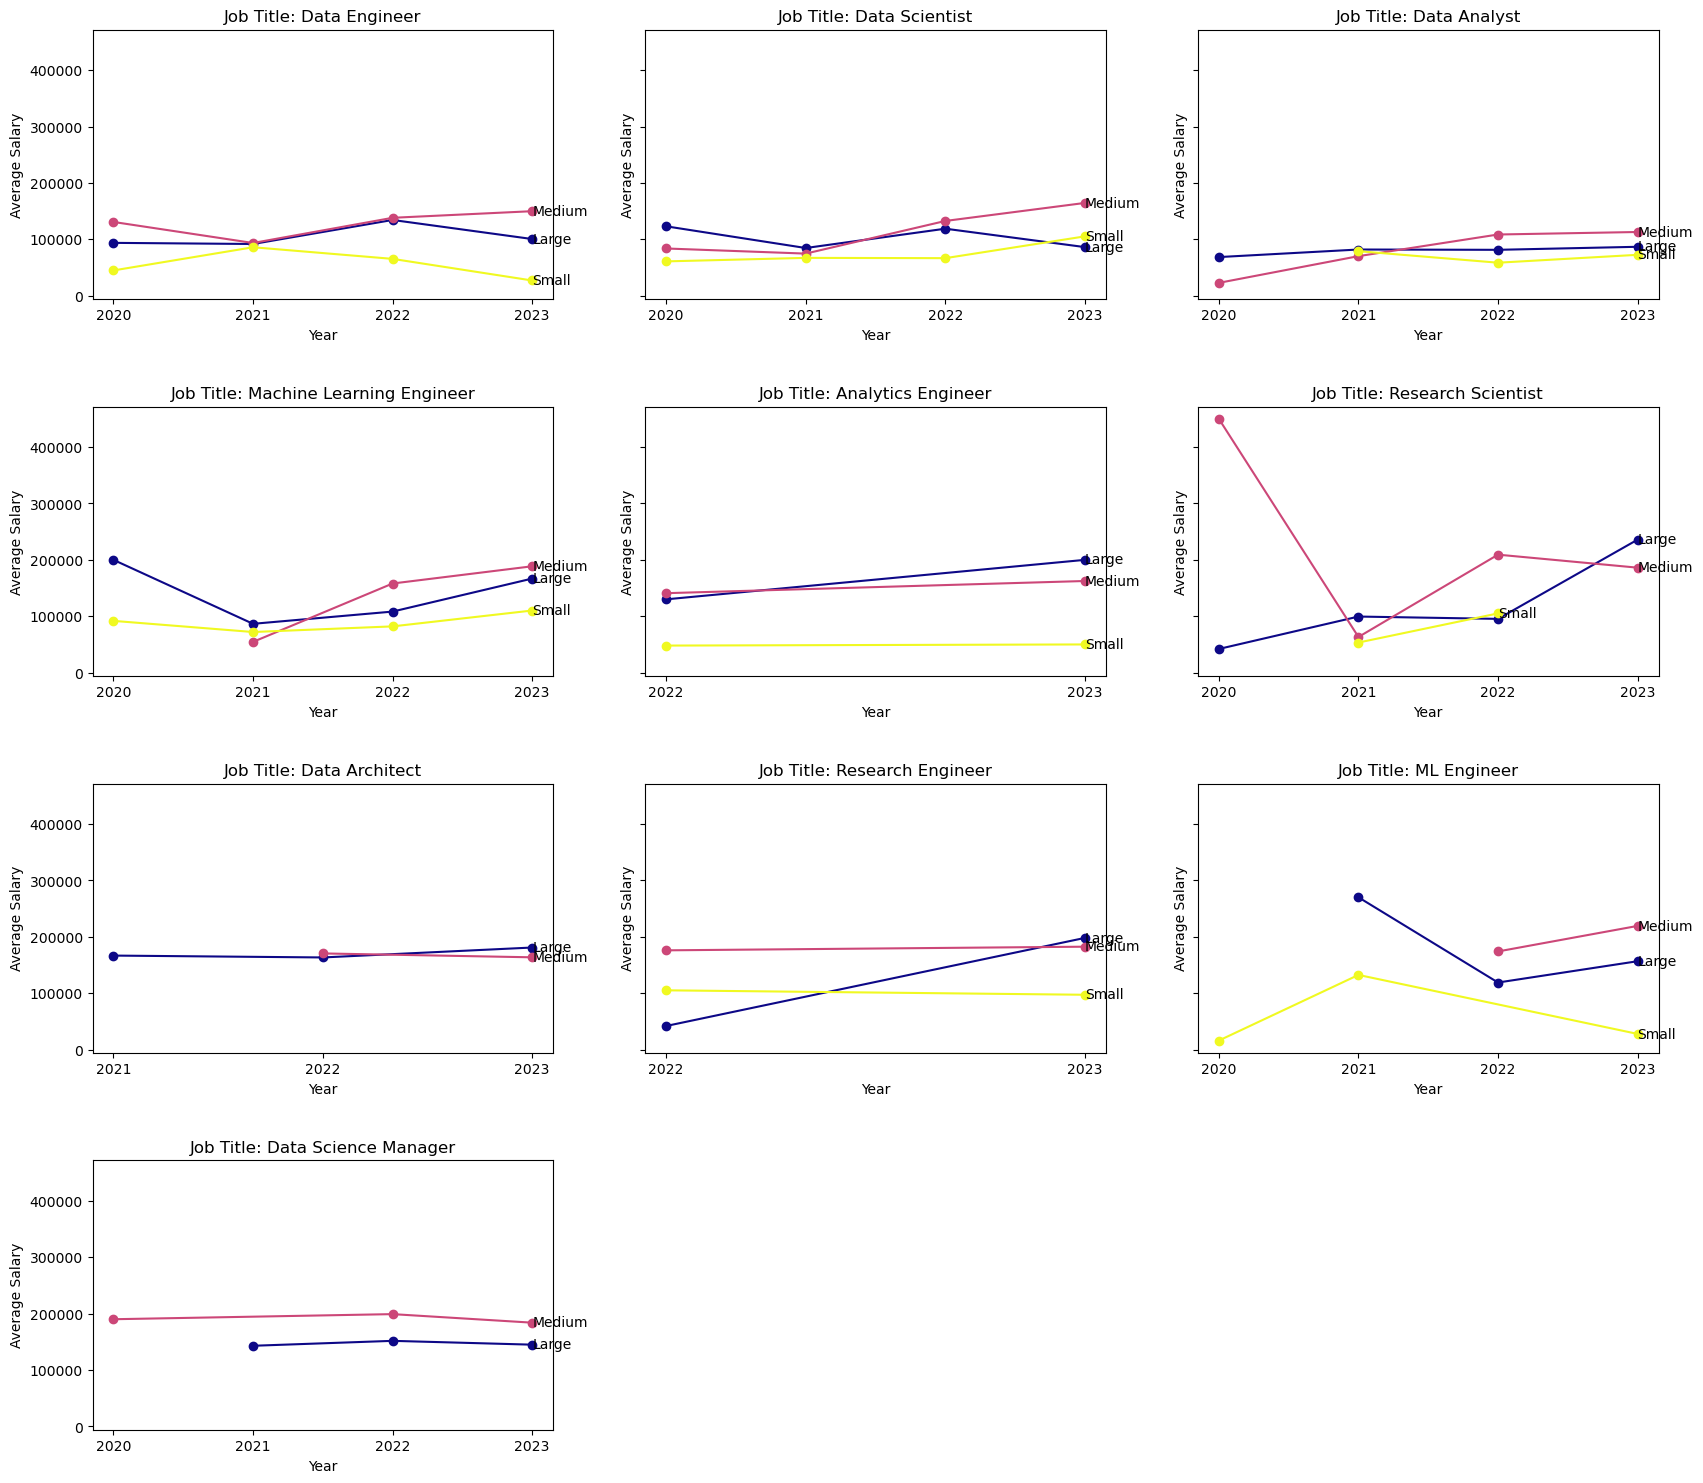

In [194]:
df_cs_avg_sal_jt_yr = df_filtered.groupby(['Job Title', 'Company Size', 'Year'])['Salary in USD'] \
                              .agg(Mean_Salary='mean') \
                              .round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Company Size', 'Year', 'Mean_Salary'], ascending=[True, True, True, False])

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_cs_avg_sal_jt_yr[df_cs_avg_sal_jt_yr['Job Title'] == job_title].sort_values('Year')
    
    # Loop through each company size and plot a separate line
    for company_size, data_company_size in data.groupby('Company Size'):
        axs[i].plot(data_company_size['Year'], data_company_size['Mean_Salary'], label=f'{company_size}', marker='o', color=color_mapping_csize[company_size])
        
        # Annotate each line with the company size
        last_index = data_company_size['Year'].idxmax()
        axs[i].text(data_company_size['Year'].iloc[-1], data_company_size['Mean_Salary'].iloc[-1], f'{company_size}', color='black', fontsize=10, ha='left', va='center')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

### Average Salary vs Experience Level

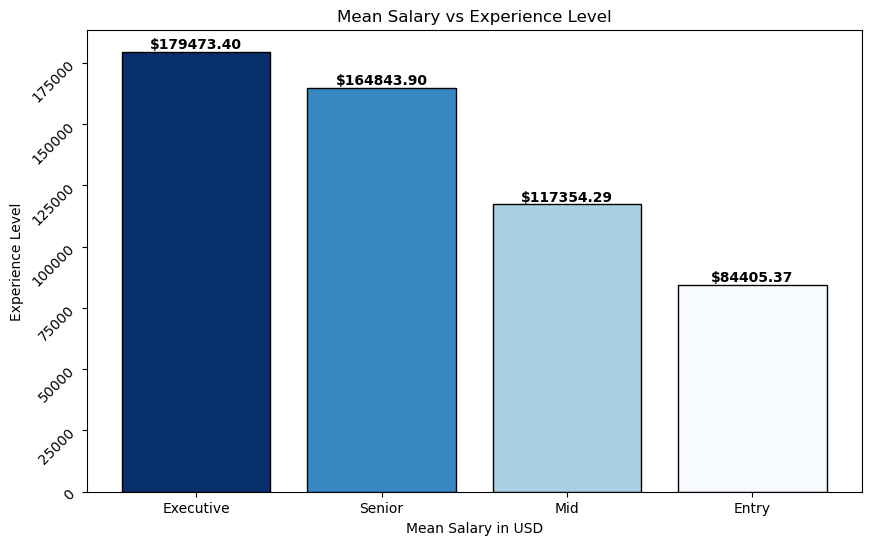

In [197]:
df_avg_sal = df_filtered.groupby('Experience Level')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)
#df_avg_sal

# Create a blue gradient colormap
colors = plt.cm.Blues_r(np.linspace(0, 1, len(df_avg_sal)))

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
bars = plt.bar(df_avg_sal['Experience Level'], df_avg_sal['Mean_Salary'], color=colors, edgecolor='black')

# Annotate each bar with the mean salary value at the top center
for bar, salary in zip(bars, df_avg_sal['Mean_Salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${salary:.2f}', ha='center', va='bottom', fontsize=10, weight='bold')

# Rotate y-axis labels
plt.yticks(rotation=45)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Experience Level')
plt.title('Mean Salary vs Experience Level')

# Display the plot
plt.show()

### Average Salary vs Experience Level (For Each Job Title)

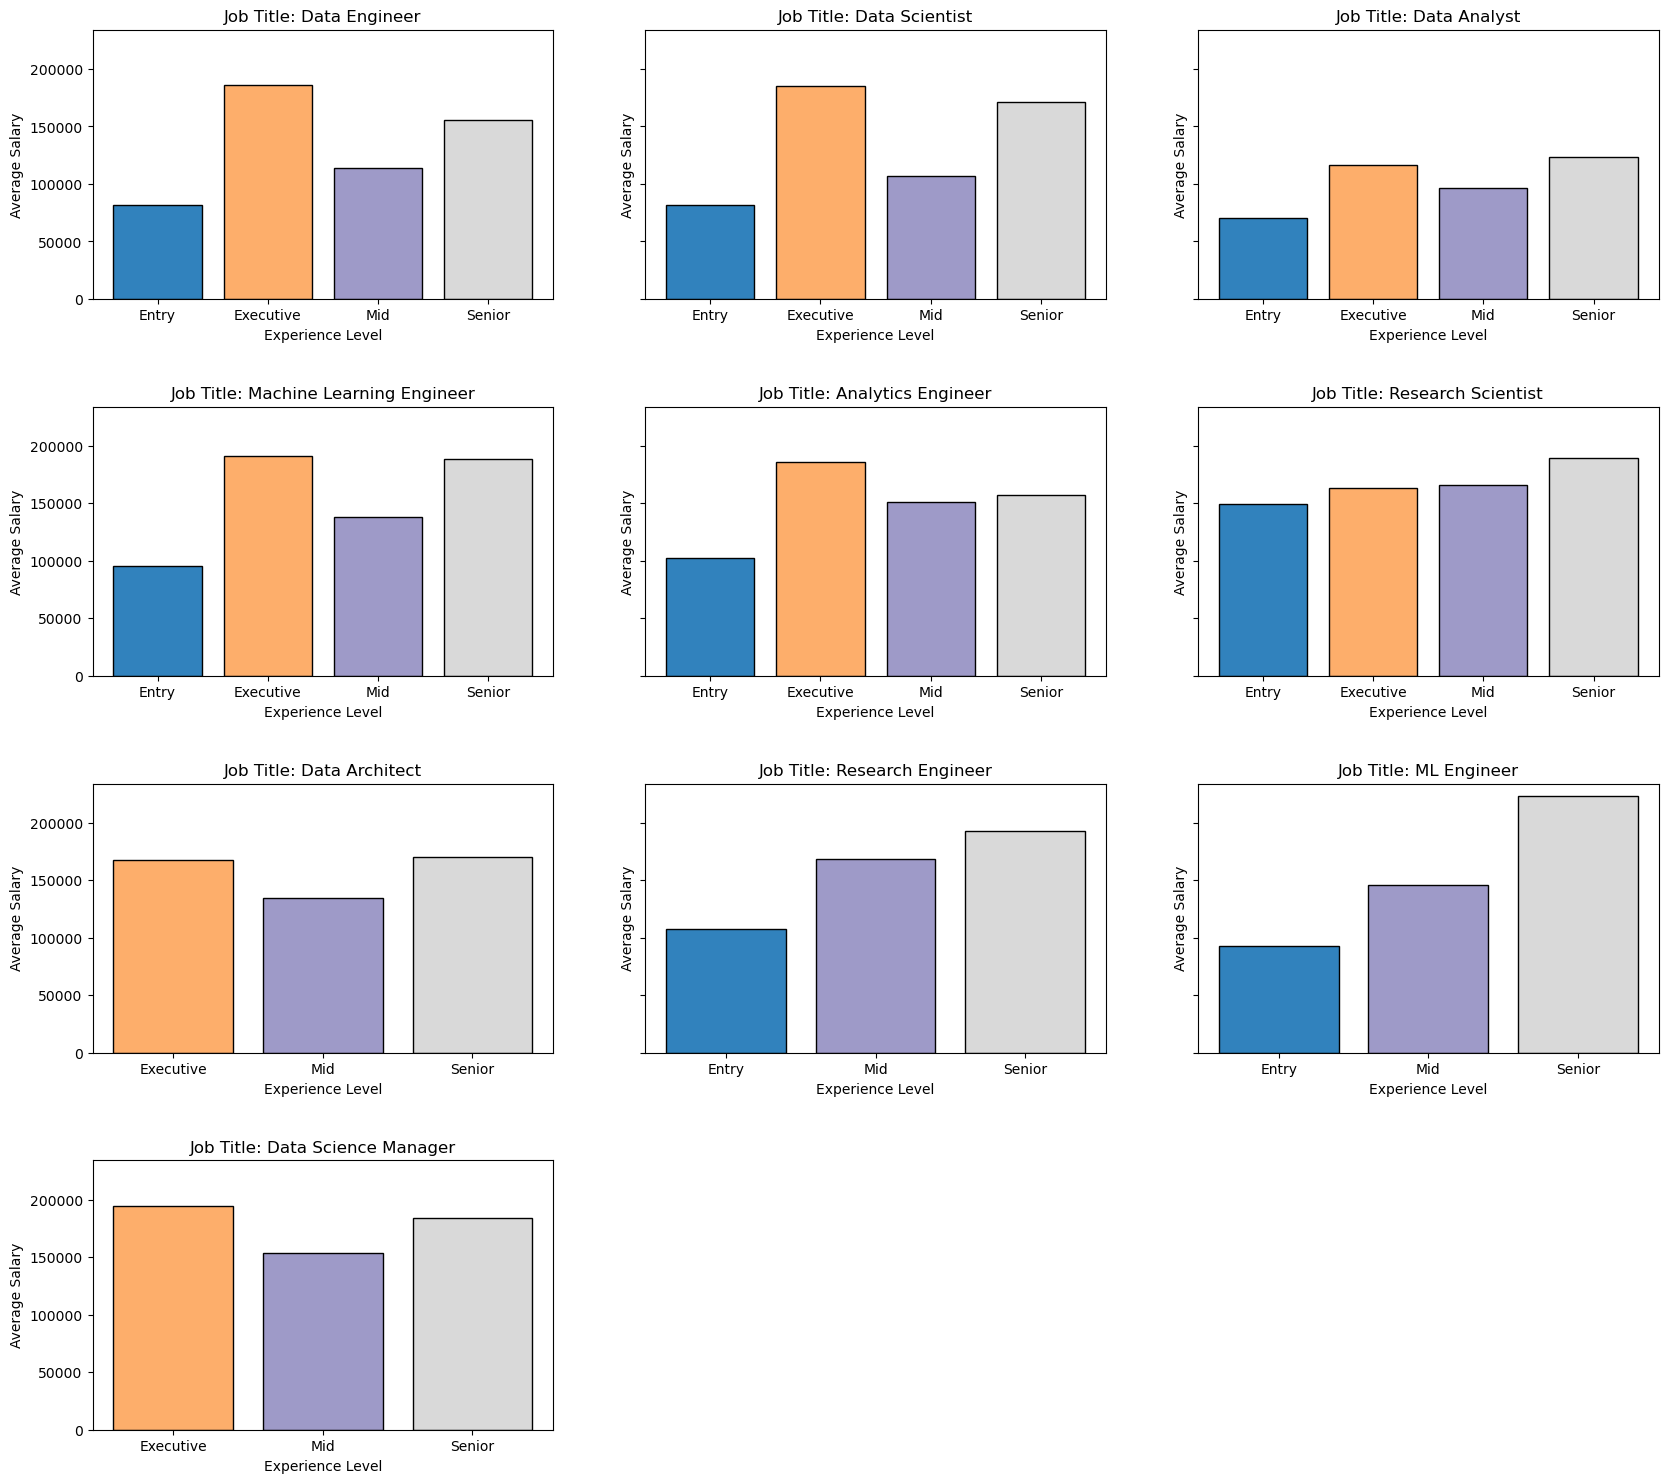

In [200]:
df_avg_sal_jt = df_filtered.groupby(['Job Title', 'Experience Level'])['Salary in USD'] \
                           .agg(Mean_Salary='mean').round(2).reset_index() \
                           .sort_values(by=['Job Title', 'Experience Level', 'Mean_Salary'], ascending=[True, True, False])

# Color Mapping
unique_experience_level = df_avg_sal_jt['Experience Level'].unique()
colors = plt.cm.tab20c(np.linspace(0, 1, len(unique_experience_level)))
color_mapping_explvl = {exp: color for exp, color in zip(unique_experience_level, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_avg_sal_jt[df_avg_sal_jt['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Experience Level'], data['Mean_Salary'], color=[color_mapping_explvl[exp] for exp in data['Experience Level']], edgecolor='black')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Experience Level'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Experience Level')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

### Average Salary vs Experience Level (For Each Job Title and Year)

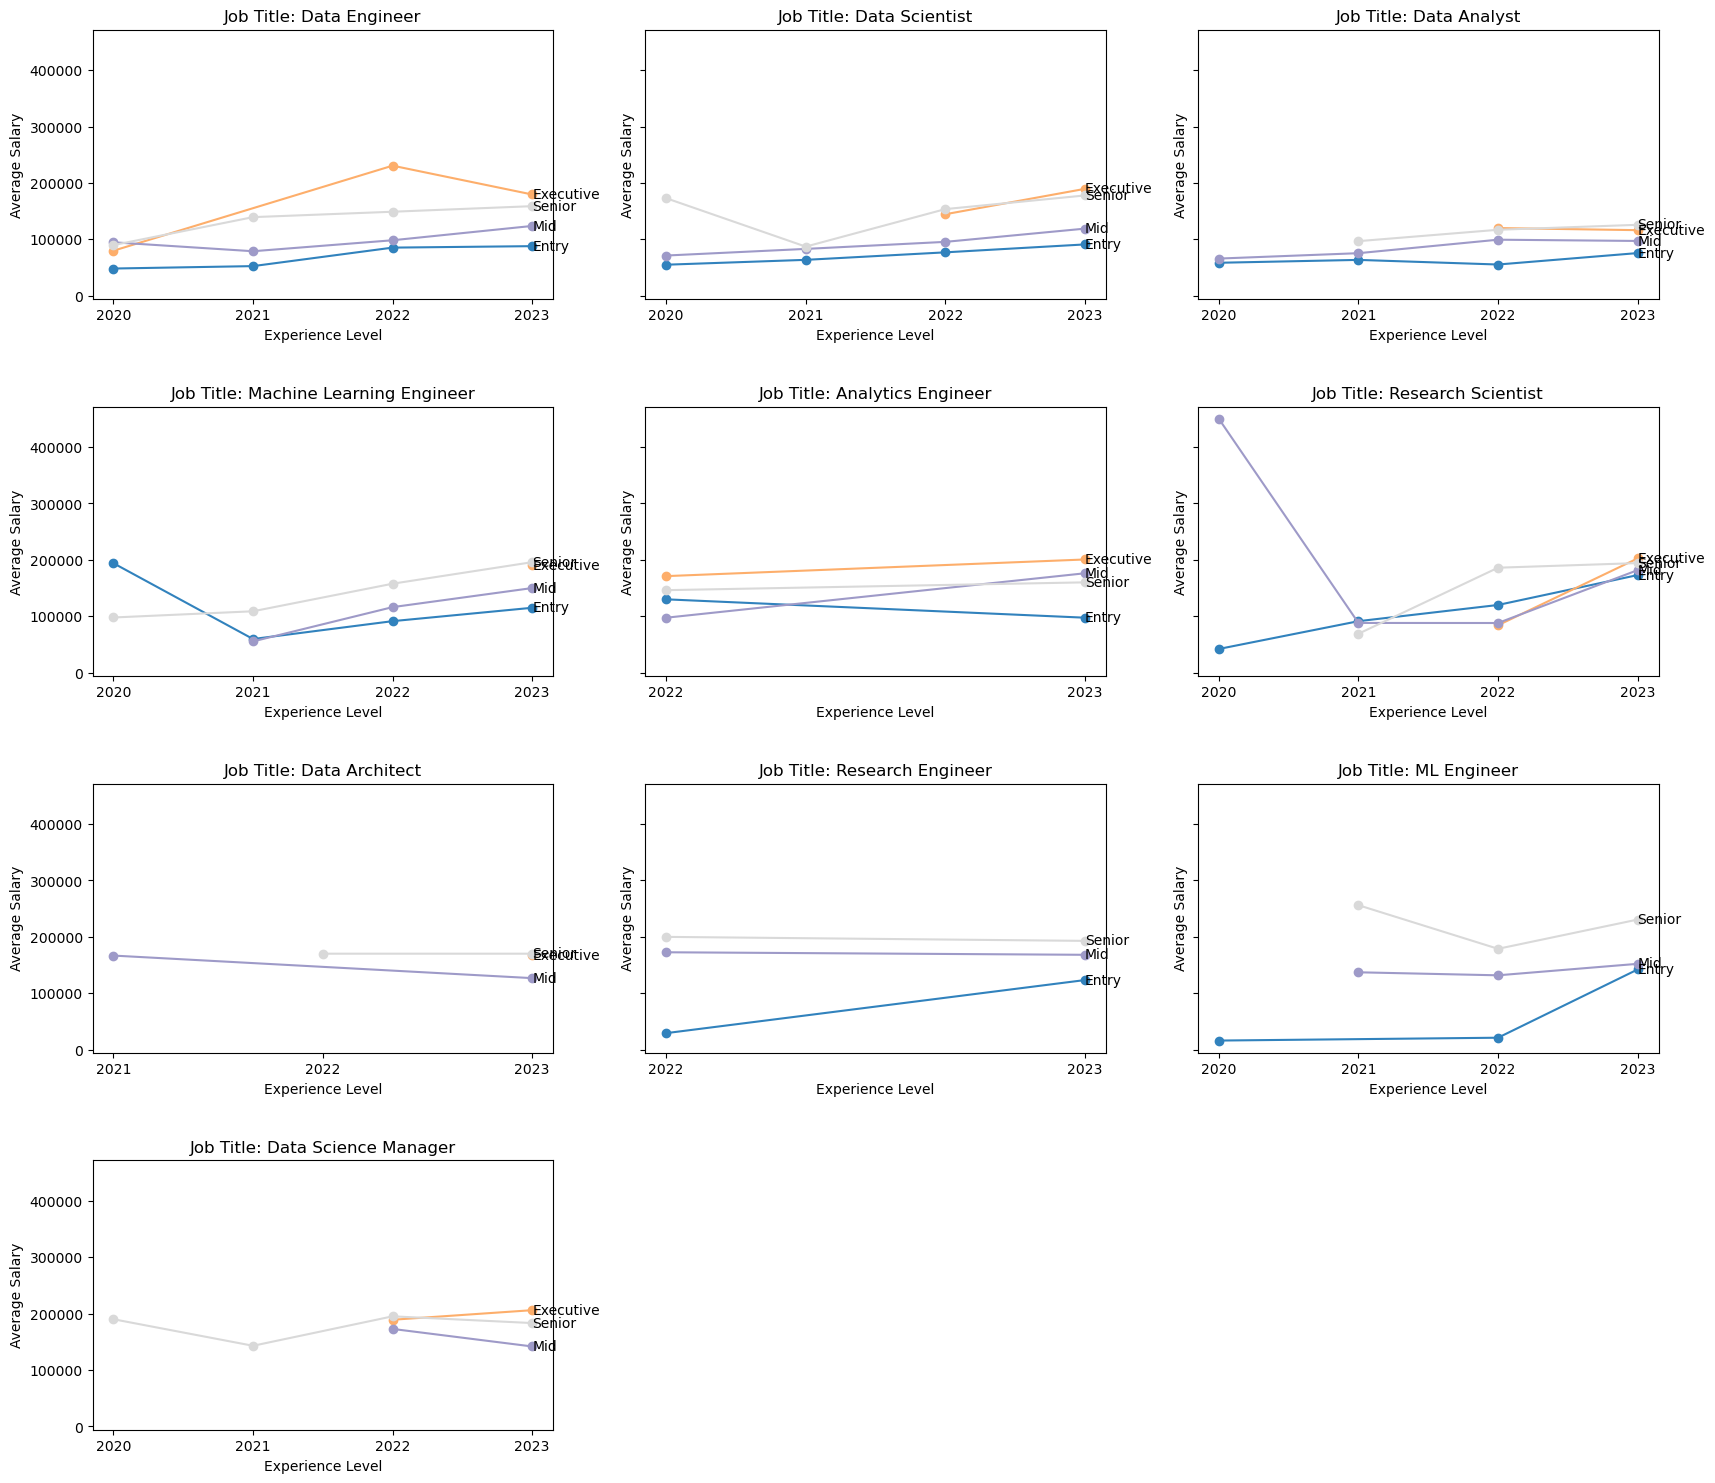

In [220]:
df_avg_sal_jt_yr = df_filtered.groupby(['Job Title', 'Experience Level', 'Year'])['Salary in USD'] \
                           .agg(Mean_Salary='mean').round(2).reset_index() \
                           .sort_values(by=['Job Title', 'Experience Level', 'Year', 'Mean_Salary'], ascending=[True, True, True, False])

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_avg_sal_jt_yr[df_avg_sal_jt_yr['Job Title'] == job_title].sort_values('Year')

    # Loop through each company size and plot a separate line
    for company_size, data_company_size in data.groupby('Experience Level'):
        axs[i].plot(data_company_size['Year'], data_company_size['Mean_Salary'], label=f'{company_size}', marker='o', color=color_mapping_explvl[company_size])
        
        # Annotate each line with the company size
        last_index = data_company_size['Year'].idxmax()
        axs[i].text(data_company_size['Year'].iloc[-1], data_company_size['Mean_Salary'].iloc[-1], f'{company_size}', color='black', fontsize=10, ha='left', va='center')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())
    
    # Adding labels and title to each subplot
    axs[i].set_xlabel('Experience Level')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

## Conclusion

***YEAR:***


> While the number of job opportunities has increased over the years, the same cannot be said for average salaries. In many cases, average salaries saw a decline in 2021, potentially due to the ongoing impact of COVID-19. As businesses were still struggling during this period, reduced profits may have led to lower wages. Having access to company-specific data would have provided a clearer understanding of the factors contributing to this trend. 


***COMPANY LOCATION:***


> Ukraine had the highest average salary overall, but when analyzed by job title, only ML Engineer roles were present for Ukraine. Given the significantly higher cost of living in the United States compared to Ukraine, this suggests a potential imbalance in the data. ML Engineers do not work in isolation; other roles are equally crucial for the successful implementation of machine learning or AI projects. This observation leads me to believe that the dataset may be incomplete.


***COMPANY SIZE:***


> Medium-sized companies have consistently offered the highest average salaries for various job roles. However, no clear pattern emerges when looking at salary changes over the years. Notably, a reduction in average salaries occurred in both 2021 and 2023. The most concerning decline is for the Research Scientist role in medium-sized companies. The dip in 2021 could likely be attributed to COVID-19, while the mass layoffs in 2023 may have resulted in the dissolution of certain roles, driving down the overall average salary.

***EXPERIENCE LEVEL:***
> It’s expected that executives would command the highest salaries, which is confirmed by the holistic bar chart. However, when analyzed by job title, Senior positions showed comparable salaries to Executive roles. Salary changes appeared random, with a significant and concerning drop for the Research Scientist position. Such a drastic decline in pay for a high-paying role seems impractical, leading me to believe that the position may have been dissolved once the specific project goals were achieved.t.